In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

pd.set_option('display.max_rows',500)

# Data Prepeartion

focus is to undersatnd the final data structure 
Support each step by visual analytics

# John Hopkins GITHUB csv data

In [2]:
data_path=pd.read_csv('../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [3]:
data_path


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,977,981,989,989,989,1005,1005,1024,1024,1045
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,92,92,93,93,93,93,93,94,94,94
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,268574,276072,282437,289100,294569,299126,305966,312659,320884,329043
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,40794,41023,41299,41495,41663,41701,41846,42056,42319,42477
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,3927,3936,3945,3950,3957,3959,3966,3971,3972,3981


In [4]:
time_idx=data_path.columns[4:]

In [5]:
df_plot=pd.DataFrame({
    'date':time_idx})
df_plot.head()


,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [6]:
data_path['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                   Antigua and Barbuda
6                             Argentina
7                               Armenia
8                             Australia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                              Austria
17                           Azerbaijan
18                              Bahamas
19                              Bahrain
20                           Bangladesh
21                             Barbados
22                              Belarus
23                              Belgium
24                               Belize


In [7]:
data_path[data_path['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [8]:
country_list=['Italy',
              'US',
              'Spain',
              'Germany',
              'Korea, South']

In [9]:
for each in country_list:
    df_plot[each]=np.array(data_path[data_path['Country/Region']==each].iloc[:,4::].sum(axis=0))

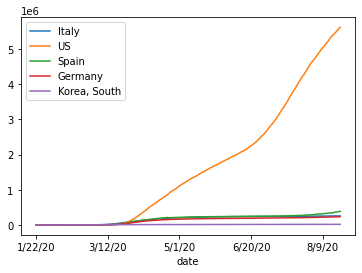

In [10]:
df_plot.set_index('date').plot()

# Data Type Date

In [11]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,1/22/20,0,1,0,0,1
1,1/23/20,0,1,0,0,1
2,1/24/20,0,2,0,0,2
3,1/25/20,0,2,0,0,2
4,1/26/20,0,5,0,0,3


In [12]:
from datetime import datetime

In [13]:
df_plot.date[0]

'1/22/20'

In [14]:
time_idx=[datetime.strptime(each,"%m/%d/%y") for each in df_plot.date]
time_str=[each.strftime('%y-%m-%d') for each in time_idx]

In [15]:
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3


In [17]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';')

# Relational data model-defining a primary key

it must constain a unique for each row of data, it cannot contain null values

In [18]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,977,981,989,989,989,1005,1005,1024,1024,1045
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068


In [19]:
data_path

'../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [20]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                                       'Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no')


In [21]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894
1,no,Albania,0,0,0,0,0,0,0,0,...,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119
2,no,Algeria,0,0,0,0,0,0,0,0,...,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667
3,no,Andorra,0,0,0,0,0,0,0,0,...,977,981,989,989,989,1005,1005,1024,1024,1045
4,no,Angola,0,0,0,0,0,0,0,0,...,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068


In [22]:
pd_relational_model=pd_data_base.set_index(['state','country']) \
                                .T                              \
                                .stack(level=[0,1])             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',0:'confirmed'},)

pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [23]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [24]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [25]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [26]:
pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)